# Missing values and imputation


## Missing values

**Source of missing values:**

* Data Extraction: It is possible that there are problems with extraction process. In such cases, we should double-check for correct data with data guardians. Some hashing procedures can also be used to make sure that data extraction is correct. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
* Data collection: These errors occur at time of data collection and are harder to correct. They can be categorized in four types:
>* Missing completely at random: This is a case when the probability of missing variable is same for all observations. For example: respondents of data collection process decide that they will declare their earning after tossing a fair coin. If an head occurs, respondent declares his / her earnings & vice versa. Here each observation has equal chance of missing value.
>* Missing at random: This is a case when variable is missing at random and missing ratio varies for different values / level of other input variables. For example: We are collecting data for age and female has higher missing value compare to male.
>* Missing that depends on unobserved predictors: This is a case when the missing values are not random and are related to the unobserved input variable. For example: In a medical study, if a particular diagnostic causes discomfort, then there is higher chance of drop out from the study. This missing value is not at random unless we have included “discomfort” as an input variable for all patients.
>* Missing that depends on the missing value itself: This is a case when the probability of missing value is directly correlated with missing value itself. For example: People with higher or lower income are likely to provide non-response to their earning.

We are going to use the Titanic dataset again in this tutorial to explore missing data.

In [1]:
#import library 
import pandas as pd
import numpy as np

In [2]:
#load the data 
df1 = pd.read_csv('titanic passenger list.csv') 

We would normally check some data basics before analysis, such as 
* length (rows)
* width (or columns)
* column types
* basic stats
* head & tail of data

We will skip this step in this tutorial.

## Task 1 Check missing values 


** info()**
* tells us total number of records
* gives us details on datatype, 'object' here means string, the others are int and float
* also include see 'non-null' observations for each data column

** describe() **by default tabulates numeric data, which report on:
* descriptive statistics 
* number of non-null observations in "count"
* with "include='all'" will include all columns and "include=['O']" will include objects

**.isnull().sum()***
* will return sum of missing values for each column



In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


There are 1309 x 14 records and there are many missing values in "age","fare" (one record) "cabin", "boat" "body" and "home.dest".

In [4]:
df1.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
df1.describe(include=['O']) # 'O' for Objects

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [6]:
df1.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


#### Which of these are potentially imputatable i.e. we can derive values from existing data?


## Task 2 investigate with missing values for ages

Titanic data is commonly used for predictive analytics, e.g. remove the 'survived' column and feed the other data into an algorithm to see if there are any predictors for survival, pclass was a factor, also gender, age another (and if you ever go on a cruise ship change your name to "Womenandchildren").

Age are mostly missing. Should we just delete or do something basic like:  

meanAge = np.mean(df1.age)

df1.age = df1.age.fillna(meanAge) 

### Discussion:

* **What's wrong with this approach?**

* **What is the average age anyway?**

*  **What is the average age for males, for females? Is that an improvement?**


In [7]:
np.mean(df1.age)

29.881137667304014

In [8]:
# age - we know there are some missing, let's dig deeper
df1['age'].value_counts()

24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
25.00    34
28.00    32
36.00    31
27.00    30
29.00    30
26.00    30
19.00    29
23.00    26
32.00    24
20.00    23
35.00    23
31.00    23
45.00    21
33.00    21
17.00    20
39.00    20
16.00    19
40.00    18
42.00    18
34.00    16
50.00    15
38.00    14
47.00    14
48.00    14
2.00     12
         ..
40.50     3
12.00     3
28.50     3
34.50     2
36.50     2
45.50     2
0.92      2
14.50     2
71.00     2
30.50     2
70.00     2
38.50     1
20.50     1
23.50     1
0.17      1
22.50     1
66.00     1
60.50     1
24.50     1
74.00     1
55.50     1
0.33      1
11.50     1
80.00     1
26.50     1
70.50     1
76.00     1
67.00     1
0.42      1
0.67      1
Name: age, Length: 98, dtype: int64

In [9]:
# mostly younger, 20s to 30s
df1['age'].unique()

array([ 29.  ,   0.92,   2.  ,  30.  ,  25.  ,  48.  ,  63.  ,  39.  ,
        53.  ,  71.  ,  47.  ,  18.  ,  24.  ,  26.  ,  80.  ,    nan,
        50.  ,  32.  ,  36.  ,  37.  ,  42.  ,  19.  ,  35.  ,  28.  ,
        45.  ,  40.  ,  58.  ,  22.  ,  41.  ,  44.  ,  59.  ,  60.  ,
        33.  ,  17.  ,  11.  ,  14.  ,  49.  ,  76.  ,  46.  ,  27.  ,
        64.  ,  55.  ,  70.  ,  38.  ,  51.  ,  31.  ,   4.  ,  54.  ,
        23.  ,  43.  ,  52.  ,  16.  ,  32.5 ,  21.  ,  15.  ,  65.  ,
        28.5 ,  45.5 ,  56.  ,  13.  ,  61.  ,  34.  ,   6.  ,  57.  ,
        62.  ,  67.  ,   1.  ,  12.  ,  20.  ,   0.83,   8.  ,   0.67,
         7.  ,   3.  ,  36.5 ,  18.5 ,   5.  ,  66.  ,   9.  ,   0.75,
        70.5 ,  22.5 ,   0.33,   0.17,  40.5 ,  10.  ,  23.5 ,  34.5 ,
        20.5 ,  30.5 ,  55.5 ,  38.5 ,  14.5 ,  24.5 ,  60.5 ,  74.  ,
         0.42,  11.5 ,  26.5 ])

Notice the 'nan' above, it doesn't occur in counts() 

### Discussion:
*  How many 'NaN' values for age are there?
*  How many 0?
*  How many < 1?
*  What does 'NaN' mean?
*  Is NaN == NaN true in Python?

In [10]:
df1[df1['age'].isnull()].head() # look at some

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY"


In [11]:
df1[df1['age'] < 1]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
359,2,1,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,13,NaN,"Bangkok, Thailand / Roseville, IL"
427,2,1,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,4,NaN,"Detroit, MI"
548,2,1,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,4,NaN,"Cornwall / Akron, OH"
590,2,1,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.7500,NaN,S,10,NaN,"Bournmouth, England"
611,3,1,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.3500,NaN,S,11,NaN,"London, England Norfolk, VA"
657,3,1,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,C,NaN,"Syria New York, NY"
658,3,1,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,C,NaN,"Syria New York, NY"
747,3,0,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S,NaN,NaN,"Stanton, IA"
763,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S,10,NaN,"Devon, England Wichita, KS"


#### What does age = 0.17 mean?

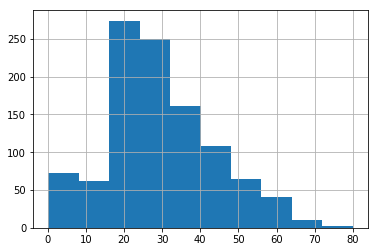

In [12]:
%matplotlib inline
df1['age'].hist()

In [13]:
sum(df1['age'].isnull())
# 263 passengers have no age recorded.

263

### Let's look at other factors, e.g. names can give a clue because most passengers seem to have a title (e.g. 'Mrs')

### Discussion:

* Can we assume that 'Mrs' implies married (implies not a child)?

* What about 'Miss' or 'Ms'?


In [14]:
# Look into titles, e.g. 'Mrs' implies married (implies not child)
def name_extract(word):
     return word.split(',')[1].split('.')[0].strip()
    
# because names are in this format:
# Allison, Master. Hudson Trevor
# we can split on ','
# then '.'

In [15]:
temp = pd.DataFrame({'Title':df1['name'].apply(name_extract)}) # testing, apply the method to the data
# check unique values
temp['Title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [16]:
# a couple of strange ones but most of the standard titles are there
temp['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Major             2
Mlle              2
Dona              1
Lady              1
Mme               1
Capt              1
Sir               1
Jonkheer          1
Don               1
the Countess      1
Name: Title, dtype: int64

In [17]:
# did we miss any?
sum(temp['Title'].value_counts())

1309

### That worked really well, we have titles for everyone and there are only a few strange ones:

Someone look up 'Jonkheer' (and Dona - Spanish?)

#### So what can we say about 'Master'? Usually refers to boys?

#### Dr, Rev, Col, Major, Capt, Sir, Don, would all be adults? 

Let's go ahead and apply this transformation:

In [18]:
df2 = df1 # copy then insert new column
df2['Title'] = df1['name'].apply(name_extract)
df2.head() # title at far right

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs


In [19]:
# just check (again) we got most of them
df2[df2['Title'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title


#### First let's check distribution of missing values across different titles

In [20]:
df2[df2.age.isnull()].Title.value_counts()

Mr        176
Miss       50
Mrs        27
Master      8
Ms          1
Dr          1
Name: Title, dtype: int64

### We will first investigate missing values in doctors

In [21]:
df2[df2['Title'] == "Dr"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA",Dr
93,1,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,A34,S,13,NaN,"San Francisco, CA",Dr
119,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,5,NaN,"New York, NY",Dr
181,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,8,NaN,"New York, NY",Dr
206,1,0,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,NaN,230.0,"Fond du Lac, WI",Dr
278,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,3,NaN,"Basel, Switzerland",Dr
508,2,0,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,NaN,NaN,"Frankfort, KY",Dr
525,2,0,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,NaN,NaN,"Hamilton, ON",Dr


Drs are mostly older (except for Dr Pain - hah)

#### What's the average age of Drs?

In [22]:
df2[df2['Title'] == "Dr"].mean()

pclass        1.250000
survived      0.500000
age          43.571429
sibsp         0.625000
parch         0.125000
fare         53.254688
body        230.000000
dtype: float64

The average age for all passengers is 29, for Drs it's 43, an improvement in fidelity?


In [23]:
df2[(df2['Title'] == "Dr") & (df2['sex'] == "male")].mean()

pclass        1.285714
survived      0.428571
age          42.666667
sibsp         0.714286
parch         0.142857
fare         57.158329
body        230.000000
dtype: float64

no missing values so move on..

#### Your turn, look at 'Maj' and any other titles that suggest age


## Missing values: ages for boys

It seems, in this era (pre Jackie Chan), Master did mean boys 

In [24]:
df2[df2['Title'] == "Master"] # how many?

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
54,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA",Master
94,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S,5,NaN,"San Francisco, CA",Master
249,1,1,"Ryerson, Master. John Borie",male,13.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY",Master
273,1,1,"Spedden, Master. Robert Douglas",male,6.00,0,2,16966,134.5000,E34,C,3,NaN,"Tuxedo Park, NY",Master
339,2,1,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S,11,NaN,"Guntur, India / Benton Harbour, MI",Master
359,2,1,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,13,NaN,"Bangkok, Thailand / Roseville, IL",Master
385,2,1,"Davies, Master. John Morgan Jr",male,8.00,1,1,C.A. 33112,36.7500,NaN,S,14,NaN,"St Ives, Cornwall / Hancock, MI",Master
398,2,1,"Drew, Master. Marshall Brines",male,8.00,0,2,28220,32.5000,NaN,S,10,NaN,"Greenport, NY",Master
427,2,1,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,4,NaN,"Detroit, MI",Master


In [25]:
#there are a lot, 61, use describe()
df2[df2['Title'] == "Master"].describe() # min age is 0.33 (4 months?), max is 14.5, mean is 5.5

,pclass,survived,age,sibsp,parch,fare,body
count,61.000000,61.000000,53.000000,61.000000,61.000000,61.000000,3.00000
mean,2.655738,0.508197,5.482642,2.049180,1.377049,36.008195,24.00000
std,0.629424,0.504082,4.161554,1.961515,0.552688,40.677102,37.26929
min,1.000000,0.000000,0.330000,0.000000,0.000000,3.170800,1.00000
25%,2.000000,0.000000,2.000000,1.000000,1.000000,15.245800,2.50000
50%,3.000000,1.000000,4.000000,1.000000,1.000000,26.000000,4.00000
75%,3.000000,1.000000,9.000000,4.000000,2.000000,36.750000,35.50000
max,3.000000,1.000000,14.500000,8.000000,2.000000,262.375000,67.00000


In [26]:
df2[df2['Title'] == "Master"].mean()

pclass       2.655738
survived     0.508197
age          5.482642
sibsp        2.049180
parch        1.377049
fare        36.008195
body        24.000000
dtype: float64

### Discussion

* How many boys don't have an age?
* What does describe() (above) tell us about pclass, sibsp, parch?
* Do any children not have any siblings or parents travelling with them?
* Any other factors that can help determine (or impute) age?



## Task 3 Mean imputation of age by title 

In this task you need to calculate the mean age for each title group and use the imputed values to replace the missing values in the corresponding group. 

In [27]:
# this seems too easy, is it right? 
df2["age"].fillna(df2.groupby("Title")["age"].transform("mean"), inplace=True)
df2.age.describe()

count    1309.000000
mean       29.896894
std        13.193803
min         0.170000
25%        21.774238
50%        30.000000
75%        36.000000
max        80.000000
Name: age, dtype: float64

In [28]:
df2.groupby("Title")["age"].transform("mean")

0       21.774238
1        5.482642
2       21.774238
3       32.252151
4       36.994118
5       32.252151
6       21.774238
7       32.252151
8       36.994118
9       32.252151
10      54.000000
11      36.994118
12      24.000000
13      21.774238
14      32.252151
15      32.252151
16      32.252151
17      36.994118
18      21.774238
19      32.252151
20      32.252151
21      36.994118
22      32.252151
23      21.774238
24      21.774238
25      32.252151
26      32.252151
27      36.994118
28      21.774238
29      32.252151
          ...    
1279    21.774238
1280    32.252151
1281    32.252151
1282    32.252151
1283    32.252151
1284    32.252151
1285    32.252151
1286    36.994118
1287    32.252151
1288    32.252151
1289    32.252151
1290    36.994118
1291    32.252151
1292    32.252151
1293    32.252151
1294    32.252151
1295    32.252151
1296    32.252151
1297    32.252151
1298    32.252151
1299    32.252151
1300    36.994118
1301    32.252151
1302    32.252151
1303    32